In [2]:
import pandas as pd

# 讀取檔案
file_path = "bostonh.dat"
df = pd.read_csv(file_path, sep = r"\s+", header = None)  # r"\s+" 表示以一個或多個空格分隔
df.columns = [f"X{i+1}" for i in range(df.shape[1])]

In [3]:
# 檢視檔案
print(df.head())

        X1    X2    X3  X4     X5     X6    X7      X8  X9    X10   X11  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

      X12   X13   X14  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [4]:
# 檢視是否有缺值
print(f"NAs:\n{df.isna().sum()}")

NAs:
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
dtype: int64


In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 定義特徵變數和目標變數
x = df.drop("X14", axis = 1)  # 定義房價以外為特徵變數
y = df["X14"]  # 定義房價為目標變數

# 標準化
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns = x.columns, index=x.index)


In [6]:
pca = PCA()  # 保留全部 PC
#pca = PCA(n_components = 0.95)  # 設定保留 95% 的變異數

print(f"降維前的資料形狀: {x_scaled.shape}")
x_reduced = pd.DataFrame(pca.fit_transform(x_scaled), index = x.index)
print(f"降維後的資料形狀: {x_reduced.shape}")
print(f"選擇的主成分數量: {pca.n_components_}")

降維前的資料形狀: (506, 13)
降維後的資料形狀: (506, 13)
選擇的主成分數量: 13


In [7]:
# 建立 PCA 成分的 DataFrame，加入變異量與最重要變數
pca_components_df = pd.DataFrame(
    pca.components_,  # PCA 成分矩陣
    columns = x.columns,  # 原始特徵名稱
    index = [f"PC{i+1}" for i in range(pca.n_components_)]  # 命名 PCA 主成分
)

# 計算變異量（Explained Variance）
pca_components_df["Explained Variance"] = pca.explained_variance_ratio_

# 計算累積變異量（Cumulative Explained Variance）
pca_components_df["Cumulative Explained Variance"] = pca.explained_variance_ratio_.cumsum()

# 找出每個 PCA 主成分最重要的變數（權重絕對值最大的變數）
pca_components_df["Most Important Feature"] = pca_components_df.iloc[:, :-3].abs().idxmax(axis = 1)

# 顯示結果
print(pca_components_df)

            X1        X2        X3        X4        X5        X6        X7  \
PC1   0.250951 -0.256315  0.346672  0.005042  0.342852 -0.189243  0.313671   
PC2  -0.315252 -0.323313  0.112493  0.454829  0.219116  0.149332  0.311978   
PC3   0.246566  0.295858 -0.015946  0.289781  0.120964  0.593961 -0.017675   
PC4   0.061771  0.128712  0.017146  0.815941 -0.128226 -0.280592 -0.175206   
PC5  -0.082157 -0.320617  0.007811 -0.086531 -0.136854  0.423447 -0.016691   
PC6   0.219660  0.323388  0.076138 -0.167490  0.152983 -0.059267  0.071709   
PC7   0.777607 -0.274996 -0.339576  0.074136 -0.199635  0.063940  0.116011   
PC8  -0.153350  0.402680 -0.173932  0.024662 -0.080121  0.326752  0.600823   
PC9   0.260390  0.358137  0.644416 -0.013728 -0.018522  0.047898 -0.067562   
PC10 -0.019369 -0.267527  0.363532  0.006182 -0.231056  0.431420 -0.362779   
PC11  0.109644 -0.262756  0.303169 -0.013927 -0.111319 -0.053162  0.459159   
PC12  0.086761 -0.071425 -0.113200 -0.003983  0.804323  0.152873

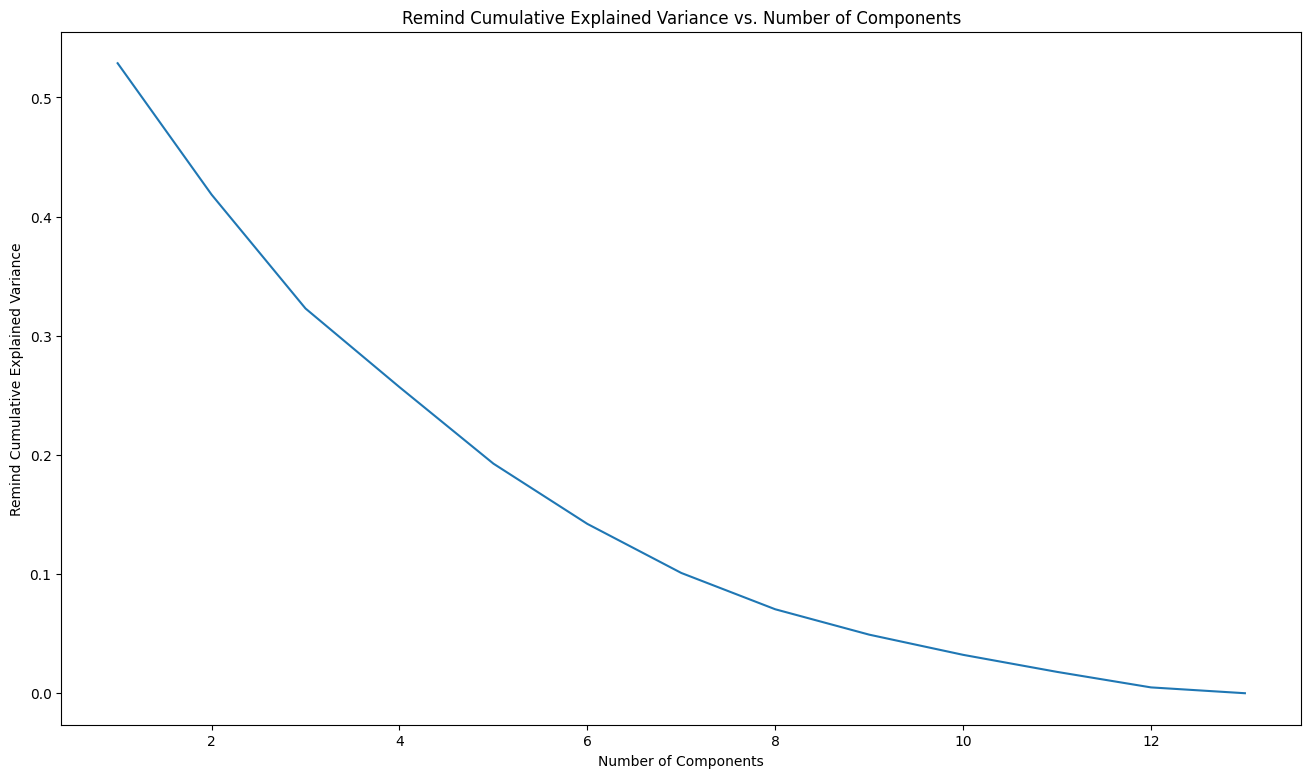

In [8]:
# 繪製剩餘累積變異量
plt.figure(figsize = (16, 9))
plt.plot(np.arange(1, pca_components_df.shape[0] + 1), 1 - pca_components_df["Cumulative Explained Variance"])
plt.xlabel("Number of Components")
plt.ylabel("Remind Cumulative Explained Variance")
plt.title("Remind Cumulative Explained Variance vs. Number of Components")
plt.show()

In [9]:
# 找出 PC 所有的點
pc_df = pd.DataFrame()
for i in range(pca.components_.shape[0]):
    pc_df[f"PC{i+1}"] = x.values @ pca.components_[i]
print(pc_df.head())

         PC1        PC2        PC3        PC4         PC5         PC6  \
0  38.890181  32.935324 -51.873961  92.167019  178.427648  382.499065   
1  33.023432  54.798669 -71.207997  83.321389  176.841195  367.268772   
2  26.538735  48.768409 -67.853639  85.185186  178.071394  362.405072   
3  12.756987  47.783518 -72.338822  86.619758  177.275189  358.347339   
4  15.652406  50.778719 -73.709208  85.656877  177.036592  360.899950   

         PC7        PC8        PC9       PC10       PC11       PC12  \
0 -63.253078  32.971896 -64.423458  25.122328  47.667764 -56.089807   
1 -41.167341  40.135316 -59.975715  26.991812  53.496420 -45.713799   
2 -43.914223  27.501830 -57.556203  30.316431  46.747978 -42.276562   
3 -37.954676  20.639702 -56.427659  32.854127  36.984715 -33.688927   
4 -36.574611  26.755055 -57.546991  31.525144  40.145396 -35.216528   

         PC13  
0  206.962371  
1  167.304566  
2  167.918899  
3  154.655918  
4  154.388828  


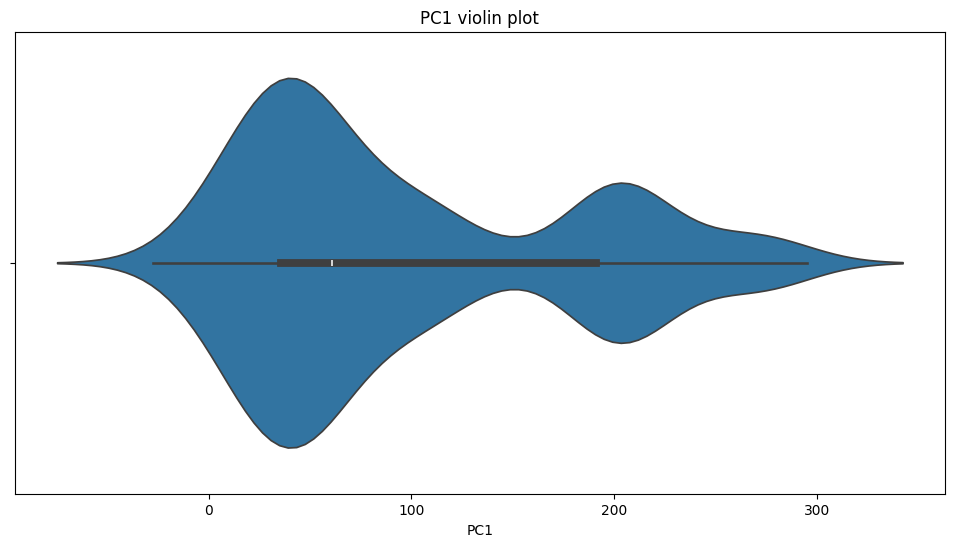

In [10]:
# 繪製 PC1 圖
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 6))
sns.violinplot(data = pc_df["PC1"], orient = "h")
plt.title("PC1 violin plot")
plt.xlabel("PC1")
plt.show()

In [13]:
# 繪製 PC1 圖
import plotly.express as px

fig = px.violin(pc_df,
                 y = "PC1", 
                 title = "PC1 violin plot",
                 labels = {"PC1": "PC1"},
                 points = "all",
                 box = True  # 顯示四分位數
                 )

fig.update_traces(
    box_width = 0.1  # 控制四分位數框的寬度，讓框小一點
)

fig.update_layout(
    width = 600,  # 設定寬度
    height = 600,  # 設定高度
)

fig.write_html("PC1 violin plot.html")
fig.show()

In [12]:
# 繪製 PC1 、 PC2 圖
import plotly.express as px
fig = px.scatter(pc_df,
                 x = "PC1", 
                 y = "PC2", 
                 title = "PC1 and PC2 scatter plot",
                 labels = {"PC1": "PC1", "PC2": "PC2"}
                 )

fig.update_layout(
    width = 600,  # 設定寬度
    height = 600,  # 設定高度
)

fig.write_html("PC1 and PC2 scatter plot.html")
fig.show()